<a href="https://colab.research.google.com/github/guilhermedossantos/NN_with_different_structures_Test/blob/master/redes_dif_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tentativa de Comparação entre Redes com Diferentes Estruturas

In [2]:
#### SETUP ####
# Keras
from keras.models import Sequential # modelo
from keras.layers import Dense, SimpleRNN, LSTM, Reshape # camadas
from keras.callbacks import EarlyStopping # early stopping

# Importação do arquivo
from google.colab import files

# Gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # usado no qq-plot
import plotly.tools as tls # para tentativa de converter mpl to plotly

Using TensorFlow backend.


In [4]:
# Upload do arquivo (específico do google colab por ser online)
#files.upload()

Saving serie_bilheteria.csv to serie_bilheteria.csv


{'serie_bilheteria.csv': b'"","x"\r\n"1",49.2\r\n"2",109.9\r\n"3",217.3\r\n"4",100.6\r\n"5",289.2\r\n"6",675.7\r\n"7",418.3\r\n"8",157.6\r\n"9",26.5\r\n"10",115.7\r\n"11",97.8\r\n"12",608.1\r\n"13",27.1\r\n"14",68.8\r\n"15",203.3\r\n"16",165.5\r\n"17",372.7\r\n"18",434.9\r\n"19",344\r\n"20",173.4\r\n"21",149\r\n"22",200\r\n"23",204.8\r\n"24",309.6\r\n"25",62.8\r\n"26",165.6\r\n"27",366.1\r\n"28",144\r\n"29",336.1\r\n"30",726.5\r\n"31",238.8\r\n"32",191.7\r\n"33",221.8\r\n"34",136.3\r\n"35",165.8\r\n"36",593.6\r\n"37",60.8\r\n"38",171.6\r\n"39",320.6\r\n"40",76.3\r\n"41",342.1\r\n"42",295.5\r\n"43",470.5\r\n"44",293.1\r\n"45",85.6\r\n"46",136.9\r\n"47",334.9\r\n"48",468.4\r\n"49",147.7\r\n"50",184.5\r\n"51",217.7\r\n"52",73.6\r\n"53",360.3\r\n"54",501.6\r\n"55",268.4\r\n"56",260.6\r\n"57",206.3\r\n"58",256.1\r\n"59",267.7\r\n"60",455.9\r\n"61",136.2\r\n"62",185.8\r\n"63",205.7\r\n"64",153.3\r\n"65",262.8\r\n"66",458.8\r\n"67",418.2\r\n"68",334.5\r\n"69",256.2\r\n"70",179.5\r\n"71",461.4

In [0]:
# Série (raiz)
serie = pd.read_csv("https://raw.githubusercontent.com/guilhermedossantos/NN_with_different_structures_Test/master/serie_bilheteria.csv",   index_col=0)
serie = np.sqrt(np.array(serie)) # tirando a raiz da série

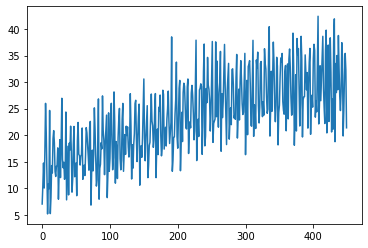

In [37]:
plt.plot(serie)

In [0]:
serie = serie.reshape(450,)

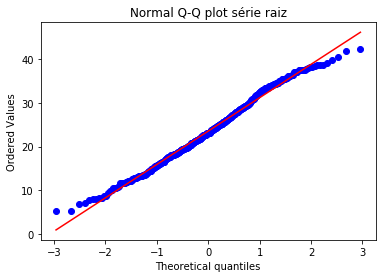

In [39]:
# q-q plot (n importa mt para as redes, mas fiquei curioso)
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal Q-Q plot série raiz")
plt.show()

In [0]:
# Função que transforma a série em uma matriz com 12 colunas (entradas da rede)
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)
 
serie_step_x, serie_step_y = convertToMatrix(serie, 12)

# Dimensões necessárias para o uso da camada recorrente
serie_step_x = serie_step_x.reshape((438, 12, 1))
serie_step_y = serie_step_y.reshape((438, 1))

# Separação Treino(350)/Validação(50)/Teste(38)
treinoX = serie_step_x[0:350]
treinoY = serie_step_y[0:350]
valX    = serie_step_x[350:400]
valY    = serie_step_y[350:400]
testeX  = serie_step_x[400:]
testeY  = serie_step_y[400:]

#treinoxmlp = treinoX.reshape((337,12))
#valxmlp = valX.reshape((38,12))
#testexmlp = testeX.reshape((38,12))


#treinoX.reshape((337,-1,12))
#treinoY = treinoY.reshape((337,1,1)) # AAAA
#valY = valY.reshape((38,))

In [12]:
print(valX.shape)
print(treinoY.shape)

#serie_step_x = serie_step_x.reshape((438, 12,1))
#serie_step_y = serie_step_y.reshape((438, 1,1))

(50, 12, 1)
(350, 1)


## Modelos

### Redes Recorrentes

In [13]:
# 1 camada com 128
model1_128_rec = Sequential([
    SimpleRNN(128, input_shape = (12,1), activation='relu'),
    Dense(1, activation='linear')
])

# 2 camadas com 64
model2_64_rec = Sequential([
    SimpleRNN(64, input_shape = (12,1), activation='relu', return_sequences=True), # return_sequences = True necessário quando a prox. camada é recorrente
    SimpleRNN(64, activation='relu'),
    Dense(output_dim = 1, activation='linear')
])

# 4 camadas com 32 neurônios
model4_32_rec = Sequential([
    SimpleRNN(32, input_shape = (12,1), activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu'),
    Dense(1, activation='linear')
])

# 8 camadas com 16 neurônios
model8_16_rec = Sequential([
    SimpleRNN(16, input_shape = (12,1), activation='relu', return_sequences=True), 
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='linear')
])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`



### Redes *feedforward*

In [0]:
model1_128_perc = Sequential([
    Dense(128, input_shape = (12,), activation='relu'),
    Dense(1, activation='linear')
])

model2_64_perc = Sequential([
    Dense(64, input_shape = (12,1), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model4_32_perc = Sequential([
    Dense(32, input_shape = (12,1), activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model8_16_perc = Sequential([
    Dense(16, input_shape = (12,1), activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

##### Compilando os modelos e treinando

In [0]:
## EARLY STOP callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', min_delta=2,
  patience=10,
  mode = 'min')

# recorrrentes
model1_128_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model2_64_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model4_32_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model8_16_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])

# feedforward
model1_128_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model2_64_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model4_32_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model8_16_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])

In [17]:
# NÃO ESQUECER DOS CALLBACKS (quando comentados)
history1 = model1_128_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history2 = model2_64_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history3 = model4_32_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history4 = model8_16_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])


(-1.4500000000000002, 30.45, 0, 50)

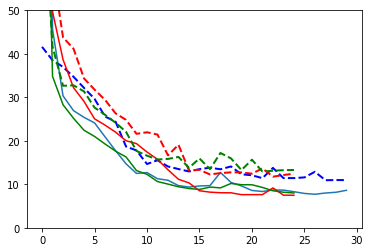

In [20]:
mpl_fig = plt.figure()
plt.plot(history1.history['loss']) #1 camada de 128
plt.plot(history1.history['val_loss'], ls = '--', color = 'b', linewidth=2)
plt.plot(history2.history['loss'], color = 'r') #2 camadas de 64
plt.plot(history2.history['val_loss'], color = 'r', ls = '--', linewidth=2)
plt.plot(history3.history['loss'], color = 'g') #4 camadas de 32
plt.plot(history3.history['val_loss'], color = 'g', ls = '--', linewidth=2)
plt.axis(ymax = 50, ymin = 0)

# tentativa de colocar no plotly
#tls.mpl_to_plotly(mpl_fig)
#plotly.offline.plot(_fig, filename="plotly version of an mpl figure")

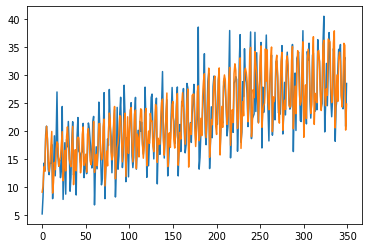

In [21]:
plt.plot(treinoY)
plt.plot(model1_128_rec.predict(treinoX))
#plt.plot(model2_64_rec.predict(treinoX), '--')
#plt.plot(model4_32_rec.predict(treinoX), '--')
#plt.plot(model8_16_rec.predict(treinoX), '--')

In [0]:
# reshape para deixar no formato para a rede feedforward (que requer uma dimensão a menos que a rede recorrente)
treinoxmlp = treinoX.reshape((350,12))
treinoymlp = treinoY.reshape((350,-1))
valxmlp = valX.reshape((50,12))
valymlp = valY.reshape((50,-1))

history1_ff = model1_128_perc.fit(x = treinoxmlp, y = treinoymlp, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history2_ff = model2_64_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history3_ff = model4_32_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history4_ff = model8_16_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])

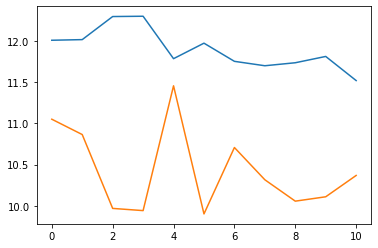

In [35]:
plt.plot(history1_ff.history['mean_absolute_percentage_error'])
plt.plot(history1_ff.history['val_mean_absolute_percentage_error'])

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])